## What Country is lending and how much


In [ ]:
# pip install plotly==4.14.1

In [27]:
# Import packages
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook" # use "pio.renderers" to see the default renderer

In [28]:
# Get all sources from the World Bank API
sources = requests.get("http://api.worldbank.org/v2/sources?per_page=100&format=json")
sourcesJSON = sources.json()
#print(sourcesJSON) # if you want to view the JSON response as is, remove the "#" at the beginning of the print command

# Parse through the response to see the source names and ID numbers.
for i in sourcesJSON[1]:
    if i["name"] == "International Debt Statistics":
        print("The source ID for International Debt Statistics is " + i["id"])
    else:
        pass
    #print(i["id"],i["name"]) # to see all the source names and IDs, remove the # at the beginning of this line

The source ID for International Debt Statistics is 6


In [29]:
# Requesting the indicators for the topic External Debt
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=6")
indicatorsJSON = indicators.json()

In [30]:
# Print the total number of indicators
print("There are " + str(indicatorsJSON[0]["total"]) + " IDS indicators")

There are 497 IDS indicators


In [31]:
# Get all External Debt indicators, with a per_page parameter of 500.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=6&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    #print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

In [32]:
# Use the indicator code to define the "indicator" variable
indicator = "DT.DOD.DLXF.CD"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

Long-term debt is debt that has an original or extended maturity of more than one year. It has three components: public, publicly guaranteed, and private nonguaranteed debt. Data are in current U.S. dollars.


In [39]:
# Requesting the Debtor locations
dlocations = requests.get("http://api.worldbank.org/v2/sources/6/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "value"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "value":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
print(dlocationsList.tail(n=40))

      id                                       value
93   PNG                            Papua New Guinea
94   PRY                                    Paraguay
95   RUS                          Russian Federation
96   RWA                                      Rwanda
97   SAS                                  South Asia
98   SDN                                       Sudan
99   SEN                                     Senegal
100  SLB                             Solomon Islands
101  SLE                                Sierra Leone
102  SLV                                 El Salvador
103  SOM                                     Somalia
104  SRB                                      Serbia
105  SSA  Sub-Saharan Africa (excluding high income)
106  STP                       Sao Tome and Principe
107  SWZ                                    Eswatini
108  SYR                        Syrian Arab Republic
109  TCD                                        Chad
110  TGO                                      

In [34]:
# Requesting the Creditor locations
clocations = requests.get("http://api.worldbank.org/v2/sources/6/counterpart-area?per_page=300&format=JSON")
clocationsJSON = clocations.json()

# Parse through the response to see the location IDs and names
clocations = clocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(clocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "value"])     
for i in range(0,listLen):
    code = clocations[i]["id"]
    name = clocations[i]["value"]
    df = df.append({"id":code, "value":name}, ignore_index = True)
clocationsList = df

# See first few items in the dataframe
print(clocationsList.head(n=10))

    id                 value
0  001               Austria
1  002               Belgium
2  003               Denmark
3  004                France
4  005  Germany, Fed.Rep. Of
5  006                 Italy
6  007           Netherlands
7  008                Norway
8  009              Portugal
9  010                Sweden


Start of the creditor details

In [54]:
# countries: Georgia GEO; 
debtorCountry = "AGO"
# countries: japan 701; norway 008; italy 006; 
creditorCountry = "701"
series = "DT.DOD.BLAT.CD"
time = "All"

In [55]:
# Setting up the API URL
url = "http://api.worldbank.org/v2/sources/6/country/"
end = "?format=json&per_page=500"
path = url+debtorCountry+"/series/"+series+"/counterpart-area/"+creditorCountry+"/time/"+time+end

# Creating a funtion that will parse through the JSON response
def getData(JSON):
    df = pd.DataFrame(columns=["year", "creditor", "debtor", "indicator","data"])
    for i in range(0,listLen):
        time = JSON["source"]["data"][i]["variable"][1]["value"]
        num = JSON["source"]["data"][i]["value"]
        df = df.append({"year":time, "creditor": creditorCountry, 
                        "debtor":debtorCountry, "indicator":series, "data":num
                       }, ignore_index = True)
    return(df)

# Getting the data from the API
custom = requests.get(path)
customJSON = custom.json()
listLen = int(len(customJSON["source"]["data"]))

# Plugging the data into the parsing function and printing the data (excluding NaN values)
IDSdata = getData(customJSON).dropna()
print(IDSdata)

    year creditor debtor       indicator         data
41  2011      701    AGO  DT.DOD.BLAT.CD   39462168.9
42  2012      701    AGO  DT.DOD.BLAT.CD  163188978.5
43  2013      701    AGO  DT.DOD.BLAT.CD  155071287.7
44  2014      701    AGO  DT.DOD.BLAT.CD  631822127.3
45  2015      701    AGO  DT.DOD.BLAT.CD  743593983.4
46  2016      701    AGO  DT.DOD.BLAT.CD  698012068.5
47  2017      701    AGO  DT.DOD.BLAT.CD  639803915.0
48  2018      701    AGO  DT.DOD.BLAT.CD  553718698.1
49  2019      701    AGO  DT.DOD.BLAT.CD  468514639.4


<Figure size 432x288 with 0 Axes>

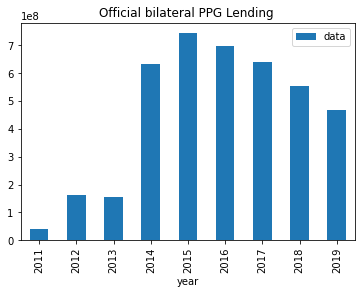

In [56]:
# Selecting the dataframe created above as the data source for the chart
# source = IDSdata
df = df.cumsum()
plt.figure();
#df.plot();

IDSdata.plot.bar (x='year', y='data', title="Official bilateral PPG Lending ");
# Plugging in the datasource, X and Y indicators, and the title for the chart
# chart = px.bar(source, 
#                x="year",
#                y="data",
#                title="Official bilateral PPG Lending from Japan to Angola (US$)")
#chart.update_layout(
#                plot_bgcolor="black")

# Displaying the chart
#chart